# Simple spherical harmonic analyses

This tutorial demonstrates how to analyse global data on the sphere using spherical harmonic functions. In contrast to the introductory notebooks that make use of the *pyshtools* classes `SHCoeffs` and `SHGrid`, these examples will instead make use of python and fortran wrapped functions.

In [1]:
from __future__ import print_function # only necessary if using Python 2.x
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pyshtools

In [2]:
pyshtools.utils.figstyle(rel_width=0.75)
# %config InlineBackend.figure_format = 'retina'  # if you are using a retina display, uncomment this line

In this example, we will use the topography of Earth that is provided in the example directory. We can read this file using `shread()`, and then expand it onto a grid using `MakeGridDH()`:

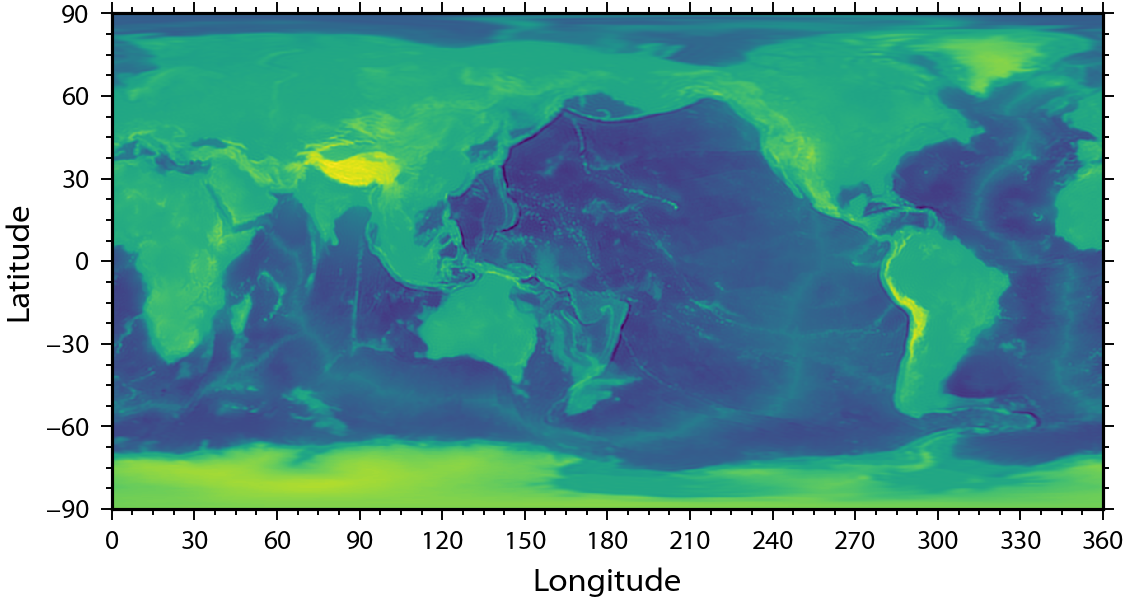

In [3]:
clm, lmax = pyshtools.shio.shread('../ExampleDataFiles/srtmp300.msl')
topo = pyshtools.expand.MakeGridDH(clm, sampling=2)

fig, ax = plt.subplots(1, 1)
ax.imshow(topo, extent=(0, 360, -90, 90))
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=np.arange(-90,120,30), xticks=np.arange(0,390,30))
ax.minorticks_on()

Using the grid `topo`, we will first demonstrate how to calculate the power spectrum, and second, how to perform simple filtering operations.

## The power spectrum

The power spectrum of a function describes how the variance of the function is distributed as a function of spherical harmonic degree. Concentration of power (or energy) in spherical harmonics with a particular wavelength can give hints about the origin of the feature. First, let's expand the gridded data into spherical harmonics using the function `SHExpandDH()`:

In [4]:
coeffs = pyshtools.expand.SHExpandDH(topo, sampling=2)

The "power spectrum" can be calculated using different conventions. The default in *pyshtools* is to calculate the total power of all angular orders as a function of spherical harmonic degee, which corresponds to the option `unit='per_l'`. The power per degree l is somewhat equivalent to the power at a given wavenumber magnitude |k| in 2D Fourier analyses. The power spectrum is computed using the function `spectrum()`:

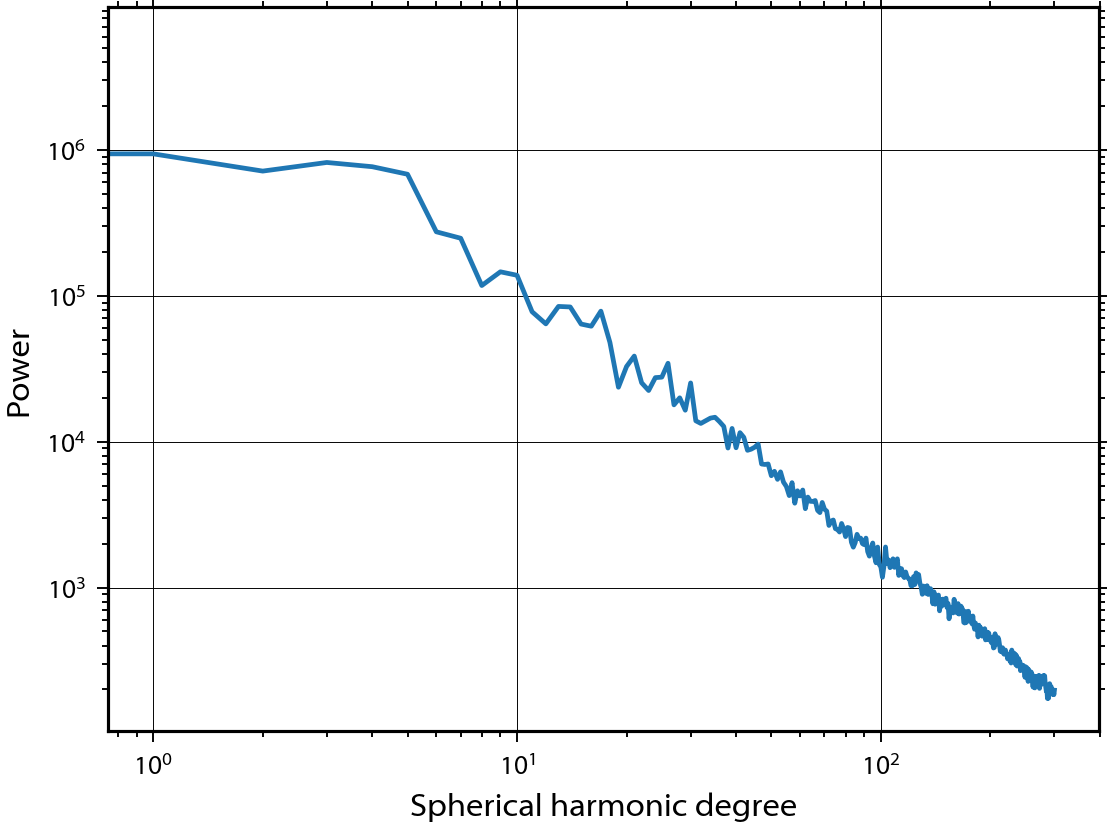

In [5]:
power_per_l = pyshtools.spectralanalysis.spectrum(coeffs)
degrees = np.arange(coeffs.shape[1])

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, power_per_l)
ax.set(yscale='log', xscale='log', xlabel='Spherical harmonic degree', ylabel='Power')
ax.grid()

The average power per coefficient as a function of spherical harmonic degree can be calculated by setting the parameter `unit` equal to `'per_lm'`. This is simply the power per degree divided by (2l+1), and is analogous to the power per wavenumber $k_x$ and $k_y$ in 2D Fourier analyses.

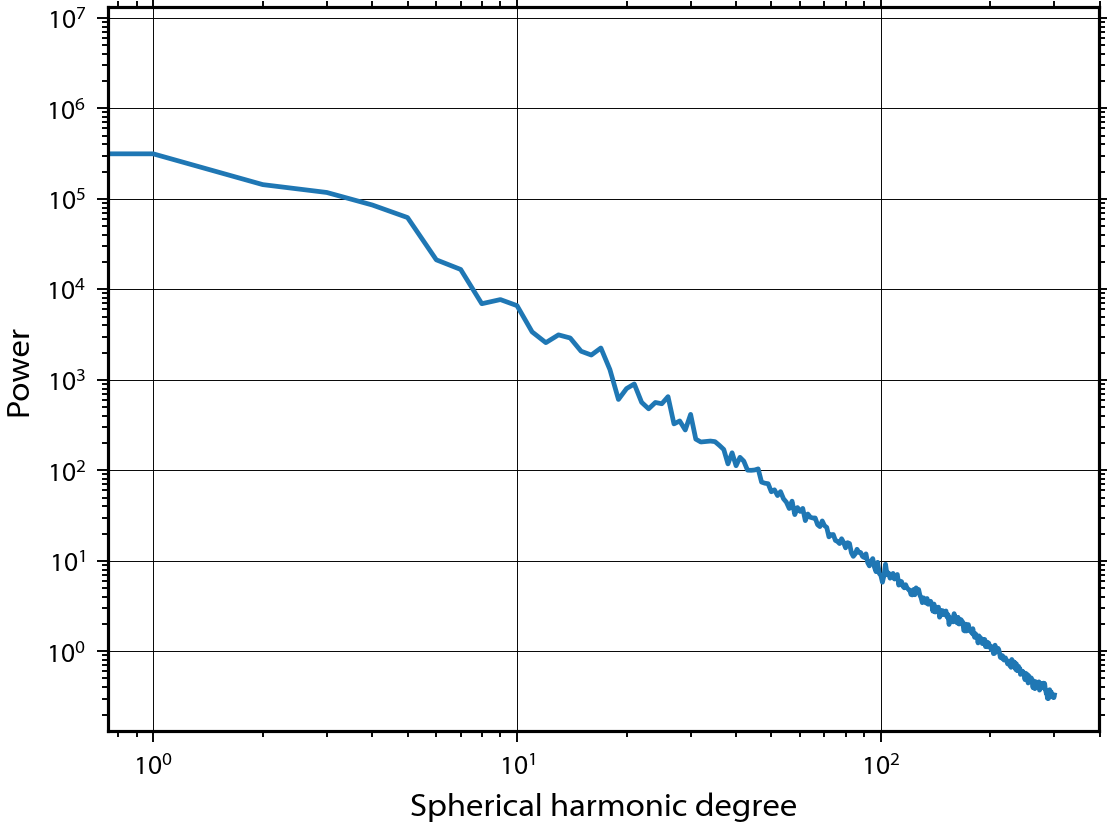

In [6]:
power_per_lm = pyshtools.spectralanalysis.spectrum(coeffs, unit='per_lm')

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, power_per_lm)
ax.set(xscale='log', yscale='log', xlabel='Spherical harmonic degree', ylabel='Power')
ax.grid()

Finally, the contribution to the total power from all angular orders over an infinitessimal logarithmic degree band `dlog_a(l)` can be calculated by setting `unit='per_dlogl'`. In this case, the contrubution in the band
`dlog_a(l)` is `spectrum(l, 'per_dlogl')*dlog_a(l)`, where `a` is the base, and where `spectrum(l, 'per_dlogl)` is equal to `spectrum(l, 'per_l')*l*log(a)`. This power spectrum is useful to analyse dominant scales.

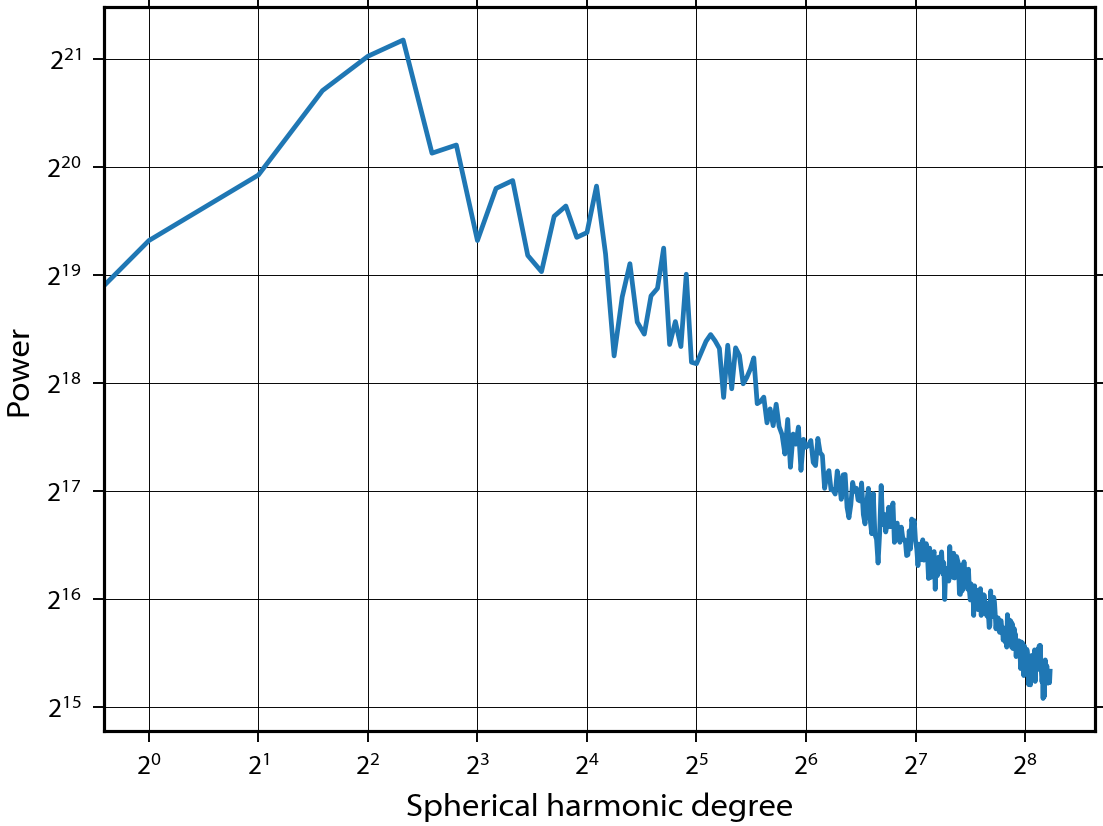

In [7]:
power_per_dlogl = pyshtools.spectralanalysis.spectrum(coeffs, unit='per_dlogl', base=2.)

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, power_per_dlogl)
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.set(ylabel='Power', xlabel='Spherical harmonic degree')
ax.grid()

## Simple Filtering

A global dataset can be filtered isotropically by multiplying the spherical harmonic coefficients by a degree-dependent function. We demonstrate this by setting the coefficients greater or equal to degree 8 equal to zero.

In [8]:
coeffs_filtered = coeffs.copy()
lmax = 8
coeffs_filtered[:, lmax:, :] = 0.

topo_filtered = pyshtools.expand.MakeGridDH(coeffs_filtered, sampling=2)

Next, we bandpass filter the data to retain only spherical harmonic coefficients between degrees 8 and 20.

In [9]:
coeffs_filtered2 = coeffs.copy()
lmin, lmax = 8, 20
coeffs_filtered2[:, :lmin, :] = 0.
coeffs_filtered2[:, lmax:, :] = 0.

topo_filtered2 = pyshtools.expand.MakeGridDH(coeffs_filtered2, sampling=2)

Finally, let's plot the two filtered data sets:

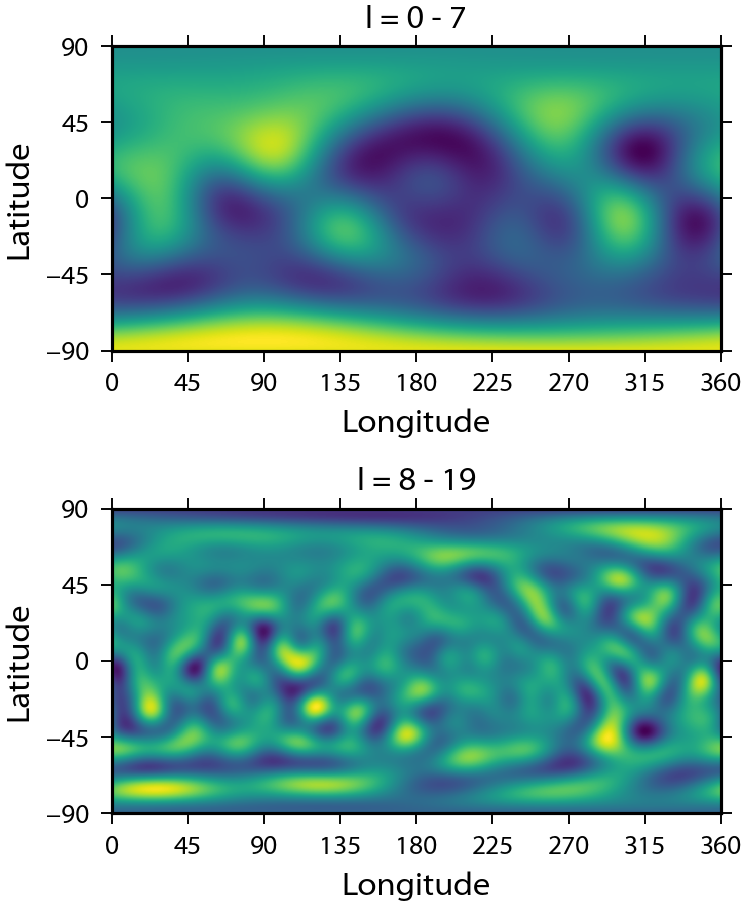

In [10]:
fig, (row1, row2) = plt.subplots(2, 1)
row1.imshow(topo_filtered, extent=(0, 360, -90, 90))
row1.set(xlabel='Longitude', ylabel='Latitude', title='l = 0 - 7', yticks=np.arange(-90,135,45), xticks=np.arange(0,405,45))
row2.imshow(topo_filtered2, extent=(0, 360, -90, 90))
row2.set(xlabel='Longitude', ylabel='Latitude', title='l = 8 - 19', yticks=np.arange(-90,135,45), xticks=np.arange(0,405,45))
fig.tight_layout()